# Decision Tree Analysis

Analyze the nba gamelog data to see if decision trees can determine whether a team will win or lose.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from src.util import load_cleaned_gamelog, encode_data

In [18]:
data = load_cleaned_gamelog()
nba_gamelog_data = encode_data(data)
nba_gamelog_data.head()

,season,game,date,team_score,opp_score,team_fg,team_fga,team_fgp,team_3p,team_3pa,...,away_OKC,away_ORL,away_PHI,away_PHO,away_POR,away_SAC,away_SAS,away_TOR,away_UTA,away_WAS
0,2000,1,941522400.0,87,94,31,78,0.397,2,6,...,False,False,False,False,False,False,False,False,False,True
1,2000,2,941695200.0,109,119,41,83,0.494,6,14,...,False,False,False,False,False,False,False,False,False,False
2,2000,3,941868000.0,113,97,44,81,0.543,3,8,...,False,False,False,False,False,False,False,False,False,False
3,2000,4,942040800.0,100,115,39,82,0.476,0,7,...,False,False,False,False,False,False,False,False,False,False
4,2000,5,942213600.0,97,102,39,92,0.424,1,7,...,False,False,False,False,False,False,False,False,False,False


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from src.util import split_data

X_train, X_test, y_train, y_test = split_data(nba_gamelog_data)
model = DecisionTreeClassifier(criterion="gini", random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6013110846245531

In [21]:
X_train, X_test, y_train, y_test = split_data(nba_gamelog_data)
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6114421930870083

In [22]:
X_train, X_test, y_train, y_test = split_data(nba_gamelog_data)
model = DecisionTreeClassifier(criterion="log_loss", random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6114421930870083

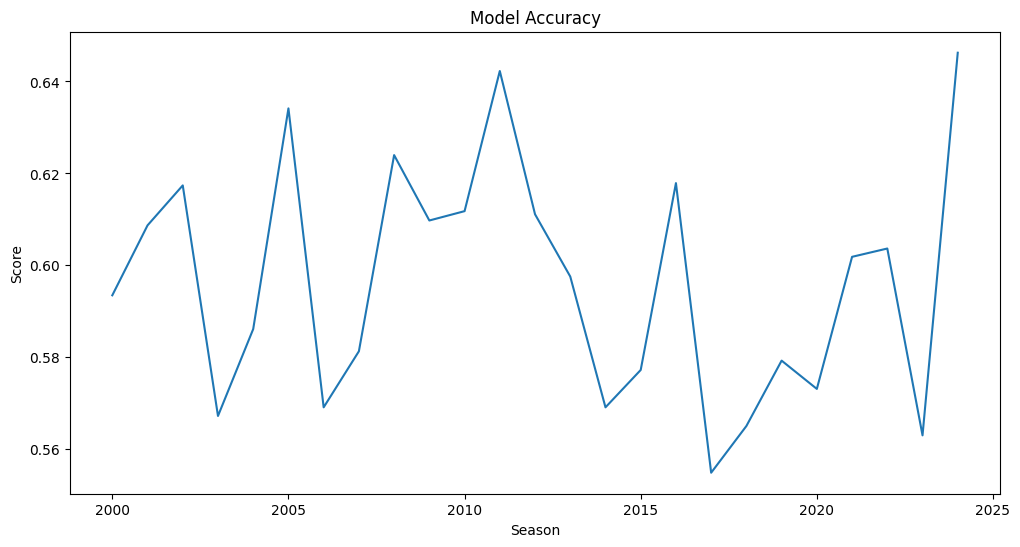

'2024 had the best accuracy: 64.63%.'

In [31]:
min_season = nba_gamelog_data["season"].min()
max_season = nba_gamelog_data["season"].max()
seasons = []
accuracies = []
top_accuracy = -1
top_season = min_season
for season in range(min_season, max_season + 1):
    season_df = nba_gamelog_data.query(f"season == {season}")

    X_train, X_test, y_train, y_test = split_data(season_df)
    model = DecisionTreeClassifier(criterion="entropy", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    seasons.append(season)
    if top_accuracy < accuracy:
        top_accuracy = accuracy
        top_season = season

plt.figure(figsize=(12, 6))
plt.plot(seasons, accuracies)
plt.title("Model Accuracy")
plt.xlabel("Season")
plt.ylabel("Score")
plt.show()

f"{top_season} had the best accuracy: {top_accuracy * 100:,.2f}%."

In [33]:
no_nas = nba_gamelog_data.fillna(-1)

X_train, X_test, y_train, y_test = split_data(no_nas)
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5840286054827175